## Welcome to ***Choose Your Perfume*** ! 🌸

Welcome to ***Choose Your perfume***🌸, a python🐍 based interface which does more than just giving great perfume recommendations. Behind this sweet scented facade actually lies detailled chemical🧪 and programming🖥️ work, carefully thought through by the creators of this project. 

The perfume industry is heavily connected to chemistry, between understanding the art of blending scents according to their chemical properties and the ability to synthesis molecules according to growing consumer demand. The exponential development of synthesised molecules started no earlier than the mid 19th century, when the technological advancement, although limited, permitted the synthesis of popular and wildly used scents such as vanillin, coumarin, aliphatic aldehydes and hydroxycitronellal⚗️. Later technological discoveries allowed the synthesis of more complex odors like oakmoss, vetiver and patchouli. Nowadays, our limitations have been significantly decreased and the extent of synthesised aroma is endless, as can be noticed in our ***Choose Your Perfume***🌸 app.

Although detailling the chemical process behind the synthesis of scents and blending of fragrances is not the goal⚽ of our app, we are able to offer the users of our Choose Your Perfume🌸 a chemical insight on their favoured scents by providing the structures of the chosen molecules and the tanimoto coefficient, which gives an indication of the structural similarities between molecules. Inside the project itself, an even deeper chemical analysis can be found, including a distribution of the structures of the molecules according to their most common scents and a graph plotting the chemical similarities bewteen molecules of a same category. 

To achieve all that is mentionned above, an abundance of functions were created, each with a unique purpose that is executed in the clearest and most succinct way. The goal of this Jupyter Notebook is therefore to provide a detailled explanation of the main functions created as well as an explanation of the chemical results obtained thanks to these functions. 

## 1. INITIALISATION

**About this notebook**: A Jupyter Notebook is a shareable document that combines computer code, plain descriptive language, data, 3D models, graphs and more. It provides aN interactive environment where code can be explained and data can be explored and visualised. This particular Jupyter notebook will walk you through the development of our project, with snippets of code to help you understand the principal functions of our app and project, as well as visual tools to illustrate the explanations and results.

**How to use this notebook**: It's not hard! Just navigate through the different cells, read the explanations provided and run the codes. Explore the different results obtained with diverse entries and experiment with the code!

The first step is to import all the dependencies and functions which will ensure that the code runs well here in this notebook. All that is needed is to run the following cell!

In [ ]:
import os
import sys
from IPython.display import display
#add imports from cells below

current_dir = os.getcwd()
project_src = os.path.abspath(os.path.join(current_dir, "..", "src", "chooseyourperfume"))
if project_src not in sys.path:
    sys.path.append(project_src)

***To clarify*** : let's go over each line of this cell:

*import os*: os (operating system) is a standard python module which is essential to import in this notebook. It is necessary for interacting with the operating system, like for example working with the file paths.

*import sys*: sys (system) is also a standard python module which is necessary for this jupyter notebook. It allows the manipulation of the python environment like the import path (sys.path).

*imports*: the rest of the imports are simply packages and modules which needed to be imported into the Jupuyter Notebook directly to ensure all codes run smoothly

*current_dir*: it simply gets the folder where the script is running (the current working directory), it is the path of, in this case, the running notebook.

*project_src*: this is a really important line, as it builds the absolute path to the python source code. This means, it moves one folder up with '..', to get out of folder notebook and than goes into the src folder, and then into chooseyourperfume. This allows the import of the functions created for the project directly into the Jupyter Notebook.

*if ... not in...*: what this line does is that in the case where the module that is to be imported in the notebook is not in the src/chooseyourperfume path, it adds the directory to the wanted module, and makes it accessible here in the notebook.

**Let's get started !**

## **2. DATASETS**

### 2.1 Purpose

***General note :***
Datasets are essential in the computing world. They are units which collect related sets of information and regroups them to allow their manipulation by the computer. They are often presented in a table, with each column representing a different set of information. Although they regroup different sets of informations, as mentionned, they often come from a single source and are meant for one project.

***And for the perfume industry? :***
The creation of datasets plays a major role in the evolution of computing skills and technology, and the perfume industry benefits a lot from it. Even though sensory and particularly olfactory processes are still essential, datasets have helped with the modernizing and enhancing of the procedures of perfume creation in several ways. Firstly, regarding perfume formulation, they allow the analysis of ingredient combination because of the understanding of the structures responsible for a certain scent provided in the datasets. Furthermore, these structures help with predicting how a molecule will smell based on its structure, which is significant for the synthesis of scents. Secondly, concerning consumer preference, datasets can identify trends based on scents and build personalised recommendations systems, similar to what is done in this project. Lastly, datasets are organised units which aid brands for marketing and categorising fragance caracter and their position in the market. Overall, it is safe to say that datasets play an crucial role in the development of this project due to its part in the perfume industry.

***Usage in the project :***
Specifically in this project, four datasets were used, each with its own purpose, although some were more useful than others. They are wielded to power the recommendation system as well as the chemical analysis elements of this project. As can be imagined, datasets are the base of this project. 

In [2]:
test_path = os.path.abspath(os.path.join("..", "data", "datasets", "Multi-Labelled_Smiles_Odors_dataset.csv"))

print("Resolved absolute path:", test_path)
print("Exists:", os.path.exists(test_path))

Resolved absolute path: c:\Users\marie\git\chooseyourperfume\data\datasets\Multi-Labelled_Smiles_Odors_dataset.csv
Exists: True


In [3]:
import importlib
import dataset  # This assumes you've already imported it

importlib.reload(dataset)

<module 'dataset' from 'c:\\Users\\marie\\git\\chooseyourperfume\\src\\chooseyourperfume\\dataset.py'>

***Description of the datasets***

- final_perfume_data: this dataset contains a commercial description of the perfumes that are recommanded, including scent description and image. It's purpose in the project is to extract scent-related keywords from its description to match with the users choices inputs which then allows for the scents to be linked to the actually notes via NLP (ask what it means)
- fra_cleaned: it contains a user-readable description of the perfumes, and it is used in this project to add realism and natural language descriptors to the recommandations
- fra_perfumes: this dataset is more structured, and includes information like the image or the brand of the perfumes. It is thanks to this dataset that the recommendations are displayed accompanied by their image.
- multi-labelled_smiles_odors: this dataset is probably the most important chemically, as it includes the SMILEs format of the molecules and their corresponding scents. As can be guessed, it is used here for the structure analysis of the scents.

### 2.2 Dataset example

To demonstrate the utility of datasets and how they are structured, please execute the following cell:

In [4]:
try:
    from dataset import (load_csv, load_smiles_odors, load_perfume_descriptions, load_fragrantica_data, load_extended_perfume_set)
    print("✅ Imports successful!")
except ImportError as e:
    print(f"❌ Import failed: {e}")

# 🧪 Helper function to load dataset safely
def try_load(name, loader_func):
    try:
        df = loader_func()
        print(f"✅ Loaded {name} ({len(df)} rows)")
        return df
    except FileNotFoundError as e:
        print(f"⚠️ Could not load {name}: {e}")
        return None

# 🔁 Load each dataset
df_smiles = try_load("Molecule Dataset", load_smiles_odors)
df_desc   = try_load("Perfume Descriptions", load_perfume_descriptions)
df_frag   = try_load("Fragrantica Data", load_fragrantica_data)
df_extended = try_load("Extended Perfume Set", load_extended_perfume_set)

# 📊 Display first few rows of each (if loaded)
if df_smiles is not None:
    display(df_smiles.head(3))

if df_desc is not None and 'Name' in df_desc.columns and 'Description' in df_desc.columns:
    display(df_desc[['Name', 'Description']].head(3))

if df_frag is not None:
    display(df_frag.head(3))

if df_extended is not None and 'Name' in df_extended.columns:
    display(df_extended[['Name', 'Gender', 'Main Accords']].head(3))

✅ Imports successful!
✅ Loaded Molecule Dataset (4983 rows)
✅ Loaded Perfume Descriptions (2191 rows)
✅ Loaded Fragrantica Data (24063 rows)
✅ Loaded Extended Perfume Set (70103 rows)


,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Name,Description
0,Tihota Eau de Parfum,"Rapa Nui for sugar, Tihota is, quite simply, ..."
1,Sola Parfum,A tribute to the expanse of space extending f...
2,Kagiroi Parfum,An aromatic ode to the ancient beauty of Japa...


,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento-overdose-pride-edition,xerjoff,Italy,unisex,"1,42",201,2022.0,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",unknown,NaN,rose,woody,fruity,aromatic,floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2024,jean-paul-gaultier,France,women,"1,86",70,2024.0,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",unknown,NaN,citrus,white floral,sweet,fresh,musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2023,jean-paul-gaultier,France,unisex,"1,91",285,2023.0,"blood orange, yuzu","neroli, orange blossom","musk, white woods",natalie gracia-cetto,quentin bisch,citrus,white floral,sweet,fresh spicy,musky


,Name,Gender,Main Accords
0,9am Afnanfor women,for women,"['citrus', 'musky', 'woody', 'aromatic', 'warm..."
1,9am Dive Afnanfor women and men,for women and men,"['fruity', 'woody', 'green', 'warm spicy', 'ar..."
2,9am pour Femme Afnanfor women,for women,"['fruity', 'musky', 'amber', 'citrus', 'powder..."


If the download was successful, the first three lines of the four used datasets should appear in an organised table, according to the informations provided by the unit. Here, it can clearly be seen that the structure of the datasets is what makes them necessary for facilitating the manipulation of its elements. Although only a small fragment of the datasets are represented above, this table conveys the abundance of information a single dataset offers. The function represented above does not belong to the project itself, it was fully created for this Jupyter Notebook, in the hopes of clarifying the format of a dataset and its use in the project, or in any other context.

### 2.3 Difficulties encoutered

***Why?***: As downloading the datasets and making them easily usable was the base for the project, it had to be ensured that no problems would be encountered while using the datasets in the varying functions. Therefore, the python script created had to be clearly written and relatively broad, to ensure it would work for all kinds of code and functions. While attempting to find the perfect datasets and to prepare them, several challenges were faced. 
- Firstly, finding datasets which include perfume names/brands and their molecular constituants proved to be difficult, as perfumes formulas are an extremely well guarded secret and also because perfumes contain many different molecules and listing them publicly is something that is rarely done. However, after a tedious search, this problem was solved and suitable datasets were found.
- Another major problem encountered was during the process of encoding the datasets. Encoding a dataset is necessary as it converts text into a specific format which a computer can store and process, usually bytes. Several encoders were tested, including UTF-8, ISO-8859-1 and cp1252. When none of the three encoders worked for all datasets, the solution found was to use UTF-8 for all the datasets, and write a function which would use ISO-8859-1 and cp1252 as back up in case UTF-8 would not work.

### 2.4 conclusion

In the code created above, it can be seen that using datasets and their informations is necessary for the development of a complex project like this one. Indeed, the vast extent of the informations needed for this app can only be retrieved from a dataset. Furthermore, finding satisfactory datasets and encoding its information were necessary steps to go through. The difficulties encountered mentionned above demonstrate that building the base of the project is not an easy task, despite the fact that it is only the foundation of the project 

### 3. RECOMMENDATIONS AND CHEMICAL ANALYSIS IN THE INTERFACE

**3.1 Description**

***General note:*** In this section, we will dive deep into the core of the project by studying and explaining the main functions. leading to the creation of the interface and the recommendation system, as well as the chemical structures of the scents and how they are presented.

***Chemical link:*** Chemically, the structure of the molecule has a huge impact on its properties. Indeed, even if two molecules contain exactly the same atoms in the same amounts, if their structure differ, they can have completely opposite features. Therefore, to predict the behaviour of certain molecules, it is essential to understand the nature of chemical bonds but also the arragement of the atoms within its structure. Without going in so much detail, here are two simple examples to help clarify the effect of the arrangement of atoms on the properties of a molecule. GO CHATGPT FOR ADDITIONNAL INFO

***Examples:*** These examples involves chiral molecules. A chiral molecule is a molecule which cannot be superposed on its mirror image, like your right and left hands.

- Carvone:
    - This first example is Carvone, commonly found in essential oils. Its (R)-Carvone structure is mostly foound in spearmint oil, thanks to its minty and cool smell.
    - On the other hand, its mirror image (S)-Carvone Caraway seeds, and is defined by its spicy and earthy smell.
- Thalidomide:
    - The first enantiomer, (R)-Thalidomide, is a sedative and helps with morning sickness, one of the syptoms of being pregnant.
    - Its mirror image however, (S)-Thalidomide, is extremely toxic and causes birth defect.

As can be observed, a simple structure difference such as taking the mirror image impacts grandly the effect of the molecule, even though they have the same chemical formulas. It can nevertheless be observed in the examples that the enantiomers are still similar  in certain aspects, such as being related to pregnancy, or being used in essential oils.

***And in the Choose your perfume app?:*** Keeping this example in mind, there are also examples of the same molecule with the same structure being responsible for several scents, which is what can be observed in the chemical analysis included in the interface of the ***Choose Your Perfume*** app.

**3.2 Usage example**

In [5]:
import importlib
import logic_cyp

importlib.reload(logic_cyp)

<module 'logic_cyp' from 'c:\\Users\\marie\\git\\chooseyourperfume\\src\\chooseyourperfume\\logic_cyp.py'>

***Usage example:*** To portray the above confirmation, here is a snippet of code which allows you to choose scents and their weight.

In [6]:
perfume_to_scent_df = load_perfume_descriptions()
perfume_df = load_extended_perfume_set()

perfume_to_scent_df.columns = perfume_to_scent_df.columns.str.strip().str.lower()

from logic_cyp import score_perfumes, enrich_with_scent_columns
from dataset import scent_categories

all_scent_notes = [note for notes in scent_categories.values() for note in notes]

import warnings
from pandas.errors import PerformanceWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", PerformanceWarning)
    perfume_to_scent_df = enrich_with_scent_columns(perfume_to_scent_df, all_scent_notes, text_column='description')
# Enrich scent columns
#perfume_to_scent_df = enrich_with_scent_columns(perfume_to_scent_df, all_scent_notes, text_column='description')

#all_scent_notes = [note for notes in scent_categories.values() for note in notes]

# Enrich descriptions with binary scent indicators
#perfume_to_scent_df = enrich_with_scent_columns(perfume_to_scent_df, all_scent_notes, text_column='description')

# Define your selected notes and weights (simulate user input)
selected_scents = ['vanilla', 'rose', 'musk']
weights = {'vanilla': 1.5, 'rose': 1.0, 'musk': 0.7}

import contextlib
import io

# Suppress prints from score_perfumes()
with contextlib.redirect_stdout(io.StringIO()):
    result_df = score_perfumes(selected_scents, perfume_to_scent_df, perfume_df, weights)

# Show only the result
display(result_df[['name', 'brand', 'score', 'description_x']].head(2))

,name,brand,score,description_x
1713,lys 41 eau de parfum,Le Labo,3.2,"A lavish, breathtaking, no-holds-barred big w..."
1234,sublimes essences musc perfume oil,Ex Nihilo,3.2,Les Sublimes Essences: a duo of exquisite per...


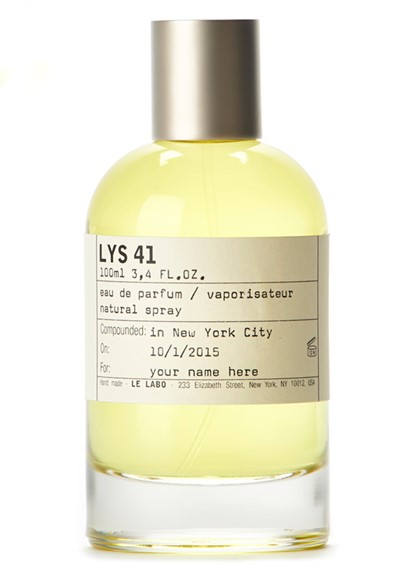

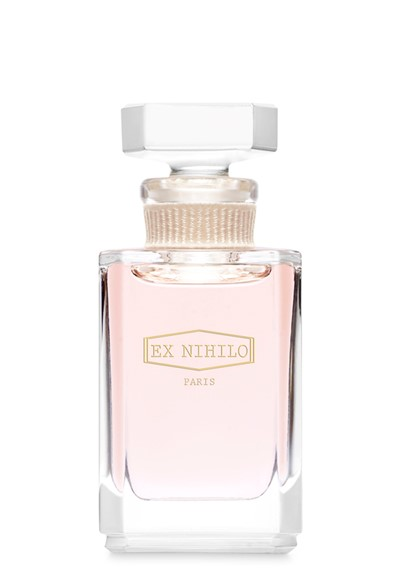

In [7]:
from IPython.display import Image, display
import requests
from io import BytesIO

# Loop over top 2 rows of the result
for _, row in result_df.head(2).iterrows():
    img_url = row.get('image url') or row.get('image_url')
    if isinstance(img_url, str) and img_url.strip():
        response = requests.get(img_url.strip())
        if response.status_code == 200:
            img_bytes = response.content  # Extract raw bytes
            display(Image(data=img_bytes))
        else:
            print(f"⚠️ Image failed to load for {row.get('name')}")
    else:
        print(f"🚫 No image available for {row.get('name')}")


🔬 Molecules for scent: 'vanilla'


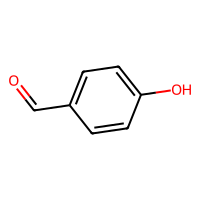

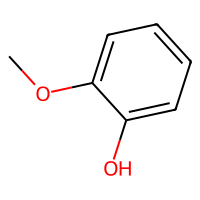

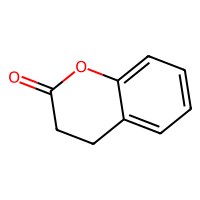


🔬 Molecules for scent: 'rose'


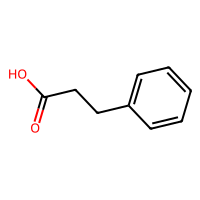

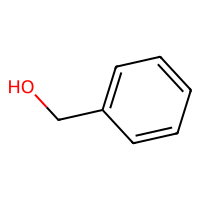

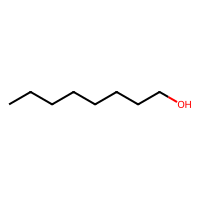


🔬 Molecules for scent: 'musk'


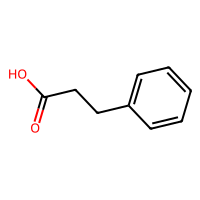

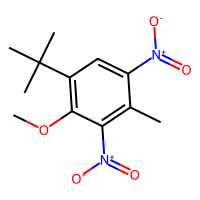

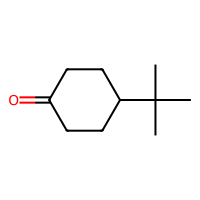

In [9]:
from logic_cyp import get_molecules_for_scents, render_molecule
from dataset import load_smiles_odors
from IPython.display import display

# Load molecule dataset (if not already)
df_smiles = load_smiles_odors()
df_smiles.columns = df_smiles.columns.str.strip().str.lower()

# Get molecules for selected scents
df_mols = get_molecules_for_scents(selected_scents, df_smiles)

# Display up to 3 molecules per scent
for scent in selected_scents:
    print(f"\n🔬 Molecules for scent: '{scent}'")
    try:
        smiles_list = df_mols[df_mols[scent] == 1]['nonstereosmiles'].dropna().unique()[:3]
        if len(smiles_list) == 0:
            print("🚫 No molecules found.")
        else:
            for smi in smiles_list:
                display(render_molecule(smi))
    except Exception as e:
        print(f"⚠️ Error for scent '{scent}': {e}")

***Observations:*** As was mentionned above, in chemistry, it can be found that nearly identical molecules, like mirror images of the same molecule, can be responsible for different scents. What is equally as interesting in chemistry, and can be observed in the example in this jupyter notebook with the scents "Rose" and "Musk", is that a single molecule can also represent two very different scents! To explain this controversy, it is important to know that most of the time, a single molecule is not responsible for a single scent. Most scents are actually a result of the blending of molecules with different properties, which explains why a scent is represented by many molecules, although this notebook only offers you three structures per scent. Scent perception is not a linear process, the nose simply cannot associate one molecule to one scent. Here's a little bit of anatomy: the nose detects scent through receptor binding, this means that receptors change shape when perceive odor molecules, sending signals to the odor-pocessing parts of the brain. Knowing this, it is important to note that a single molecule can actually trigger different receptors, some of which can be common to unalike scents. Therefore, it is a combination of molecules which will trigger a variety of receptors which will allow the brain to identify a specific scent!

**3.3 Conclusion**

...

### 4. ANALYSIS OF SCENTS

**4.1 Purpose**

While this final part of the jupyter notebook does not cover something that is present in the app, the Choose Your Perfume project goes deeper into the analysis of scent molecules. This analysis has two purpose: the first is to achieve a complex distribution of scent molecules to a single category, while the second is more to understand the chemical similarities of the different molecules in the same category. 

In [11]:
from dataset import load_smiles_odors, scent_categories
from chem_analysis import assign_primary_category

# Load molecule dataset
df_smiles = load_smiles_odors()
df_smiles.columns = df_smiles.columns.str.strip().str.lower()

# Apply the categorization
df_smiles['primary_category'] = df_smiles['descriptors'].apply(assign_primary_category)

# Show how many molecules fall into each category
category_counts = df_smiles['primary_category'].value_counts()
display(category_counts)

primary_category
Fruity                         923
Sweet / Gourmand               418
Vegetal / Herbal               335
Floral                         255
Dry / Bitter / Neutral         226
Sulfurous / Allium-like        203
Spicy / Aromatic               198
Woody / Resinous               165
Animalic / Meaty               117
Smoky / Roasted / Burnt        106
Fresh / Volatile                70
Alcohol / Solvent               63
Chemical / Medicinal            56
Earthy / Mineral / Metallic     56
Nutty / Seed                    19
Fermented / Cheesy               7
Lactonic / Milky                 3
Name: count, dtype: int64

In [16]:
%matplotlib inline

In [14]:
import importlib
import chem_analysis

importlib.reload(chem_analysis)

from chem_analysis import run_pipeline, plot_tsne

Running PCA...
Running t-SNE...


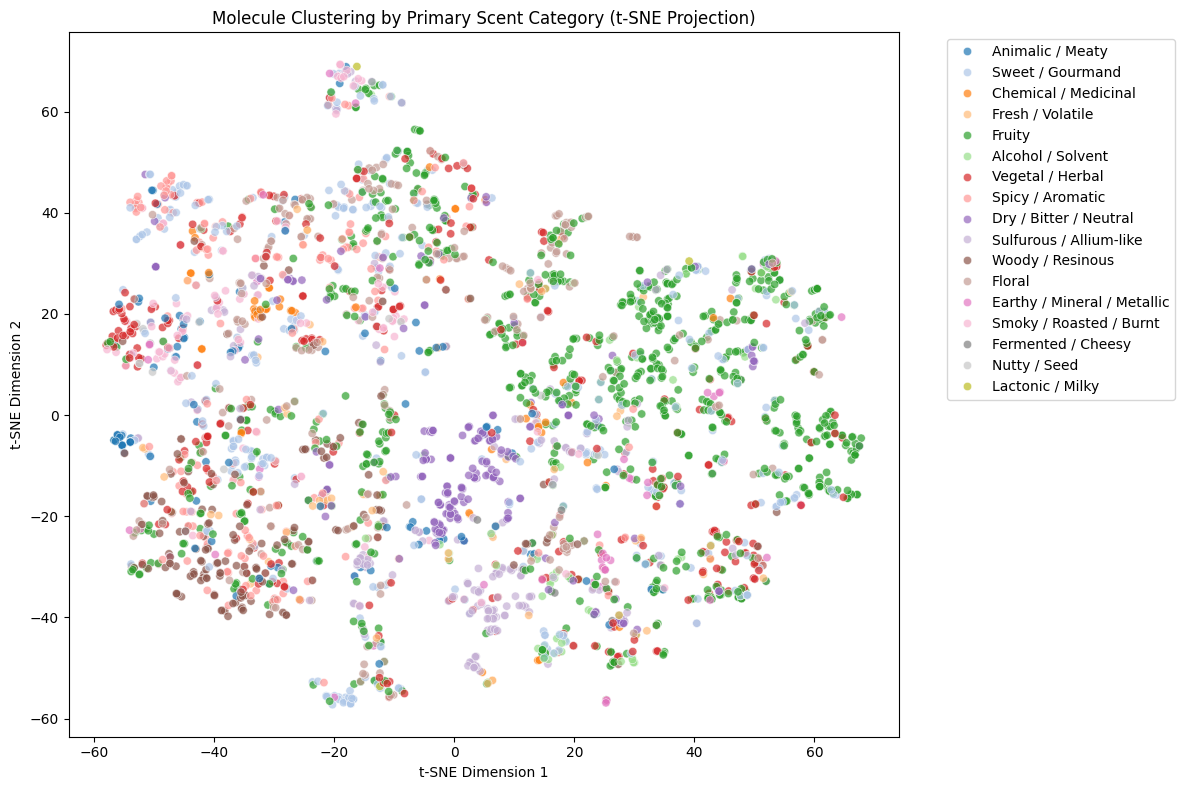

In [18]:
from chem_analysis import run_pipeline, plot_tsne

data, tsne_result = run_pipeline()
plot_tsne(data, tsne_result);